<a href="https://www.kaggle.com/code/agarwalvidhi/quora-text-classification?scriptVersionId=177130641" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Text Classification using Bag of words

Outline:

   Download and explore data

  Apply text preprocessing techniques

  Implement the bag of words model

  Train ML models for text classification

  Make Predicitions


### Download and explore data

In [ ]:
!ls

In [ ]:
# import os


In [ ]:
# os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
# !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

In [ ]:
# !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
# !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

### Explore the data

In [ ]:
# train_fname = 'data/train.csv.zip'
# test_fname = 'data/test.csv.zip'
# sample_fname = 'data/sample_submission.csv.zip'

In [4]:
data_dir = '/kaggle/input/quora-insincere-questions-classification'
train_fname = data_dir + '/train.csv'
test_fname = data_dir + '/test.csv'
sample_fname = data_dir + '/sample_submission.csv'

In [5]:
import pandas as pd

In [6]:
raw_df = pd.read_csv(train_fname)

In [7]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [8]:
raw_df.target.value_counts()

target
0    1225312
1      80810
Name: count, dtype: int64

In [9]:
raw_df.target.value_counts(normalize=True)

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

In [10]:
sincere_df = raw_df[raw_df.target == 0]

In [11]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [12]:
insincere_df = raw_df[raw_df.target == 1]

In [13]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

<Axes: xlabel='target'>

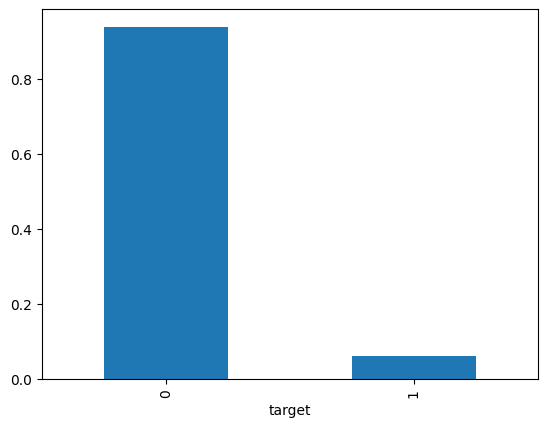

In [14]:
raw_df.target.value_counts(normalize=True).plot(kind = 'bar')

In [15]:
test_df = pd.read_csv(test_fname)

In [16]:
sub_df = pd.read_csv(sample_fname)
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


### Text Preprocessing techniques

#### Tokenization

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
q0 = sincere_df.question_text.values[0]

In [20]:
q0

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [21]:
q0_tok = word_tokenize(q0)

In [22]:
q0_tok

['How',
 'did',
 'Quebec',
 'nationalists',
 'see',
 'their',
 'province',
 'as',
 'a',
 'nation',
 'in',
 'the',
 '1960s',
 '?']

#### Stopwords

In [23]:
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
english_words = stopwords.words('english')

In [26]:
", ".join(english_words)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [27]:
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in english_words]


In [28]:
q0_tok

['How',
 'did',
 'Quebec',
 'nationalists',
 'see',
 'their',
 'province',
 'as',
 'a',
 'nation',
 'in',
 'the',
 '1960s',
 '?']

In [29]:
q0_stp = remove_stopwords(q0_tok)

In [30]:
q0_stp

['Quebec', 'nationalists', 'see', 'province', 'nation', '1960s', '?']

#### Stemming

In [31]:
from nltk.stem.snowball import SnowballStemmer

#the stemmer requires a language parameter
stemmer = SnowballStemmer(language='english')

In [32]:
q0_stm = [stemmer.stem(word) for word in q0_stp]

In [33]:
q0_stm

['quebec', 'nationalist', 'see', 'provinc', 'nation', '1960s', '?']

### Implement Bag of Words

1. Create a vocabulary using Count Vectorizer
2. Transform text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer



In [34]:
small_df = raw_df[:5]

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vectorizer = CountVectorizer()

In [37]:
vectorizer.fit(small_df.question_text)

CountVectorizer()

In [38]:
vectorizer.get_feature_names_out()

array(['1960s', 'adopt', 'adopted', 'affect', 'an', 'and', 'as', 'bike',
       'by', 'can', 'changing', 'convert', 'did', 'do', 'does', 'dog',
       'encourage', 'geometry', 'guericke', 'have', 'helicon',
       'hemispheres', 'how', 'in', 'just', 'magdeburg', 'montra',
       'mountain', 'nation', 'nationalists', 'not', 'otto', 'people',
       'province', 'quebec', 'see', 'shop', 'space', 'the', 'their',
       'time', 'to', 'tyres', 'used', 'velocity', 'von', 'why', 'would',
       'you'], dtype=object)

#### Transform documents to vector

In [39]:
vectors = vectorizer.transform(small_df.question_text)

In [40]:
vectors

<5x49 sparse matrix of type '<class 'numpy.int64'>'
	with 55 stored elements in Compressed Sparse Row format>

In [41]:
vectors.toarray()

array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 2],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        2, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0]])

In [42]:
vectors.shape

(5, 49)

#### Configure Count Vectorizer Parameters

In [43]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [44]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_words,
                             max_features=1000) #vocabulary will have top 1000 words in vocabuary

In [45]:
sample_df = raw_df.sample(100000, random_state=42)

In [46]:
vectorizer.fit(sample_df.question_text) #creates vocabulary

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x78121fade3b0>)

In [47]:
len(vectorizer.vocabulary_) #len of vocabulary

1000

In [48]:
vectorizer.get_feature_names_out()[:100] # first 100 words in vocabulary

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``',
       'abl', 'abroad', 'abus', 'accept', 'access', 'accomplish',
       'accord', 'account', 'achiev', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'address', 'admiss', 'adult', 'advanc',
       'advantag', 'advic', 'affect', 'africa', 'african', 'age', 'agre',
       'air', 'allow', 'almost', 'alon', 'alreadi', 'also', 'altern',
       'alway', 'amazon', 'america', 'american', 'amount', 'analysi',
       'android', 'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon',
       'anyth', 'apart', 'app', 'appear', 'appl', 'appli', 'applic',
       'approach', 'arab', 'area', 'armi', 'around', 'art', 'asian',
       'ask', 'associ', 'atheist', 'attack'], dtype=object)

In [49]:
inputs = vectorizer.transform(sample_df.question_text) #convert words to vectors

In [50]:
inputs.shape

(100000, 1000)

In [51]:
test_df.shape

(375806, 2)

In [52]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 3min 3s, sys: 88.6 ms, total: 3min 3s
Wall time: 3min 3s


### ML models and text classification

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target,
                                                                        test_size=0.3, random_state=42)


In [55]:
train_inputs.shape

(70000, 1000)

In [56]:
val_inputs.shape

(30000, 1000)

#### Train Logistic Regression model

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
MAX_ITER = 1000

In [59]:
model = LogisticRegression(max_iter=MAX_ITER, solver='sag')

In [60]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 22.7 s, sys: 4 ms, total: 22.7 s
Wall time: 22.7 s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Predictions

In [61]:
train_preds = model.predict(train_inputs)

In [62]:
train_targets

133883     0
343925     0
1190558    0
317078     0
355610     0
          ..
262505     0
879467     0
411614     0
859707     0
683832     0
Name: target, Length: 70000, dtype: int64

In [63]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
pd.Series(train_preds).value_counts()

0    67958
1     2042
Name: count, dtype: int64

In [65]:
pd.Series(train_targets).value_counts()


target
0    65784
1     4216
Name: count, dtype: int64

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(train_targets, train_preds)

0.9504

In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(train_targets, train_preds)

0.4451901565995526

In [70]:
val_preds = model.predict(val_inputs)

In [71]:
accuracy_score(val_targets, val_preds)

0.9468

In [72]:
f1_score(val_targets, val_preds)

0.40932642487046633

In [73]:
test_preds = model.predict(test_inputs)

In [74]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [75]:
sub_df.prediction = test_preds

In [76]:
sub_df.prediction.value_counts()

prediction
0    364955
1     10851
Name: count, dtype: int64

In [77]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv